In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import json
import gzip


In [20]:
df = pd.read_json(r'C:/Users/harr1/Downloads/reviews_Automotive_5 (1).json.gz', lines=True)

In [6]:
print (df.head())

         asin   helpful  overall  \
0  B00002243X    [4, 4]        5   
1  B00002243X    [1, 1]        4   
2  B00002243X    [0, 0]        5   
3  B00002243X  [19, 19]        5   
4  B00002243X    [0, 0]        5   

                                          reviewText   reviewTime  \
0  I needed a set of jumper cables for my new car...  08 17, 2011   
1  These long cables work fine for my truck, but ...   09 4, 2011   
2  Can't comment much on these since they have no...  07 25, 2013   
3  I absolutley love Amazon!!!  For the price of ...  12 21, 2010   
4  I purchased the 12' feet long cable set and th...   07 4, 2012   

       reviewerID     reviewerName  \
0  A3F73SC1LY51OO  Alan Montgomery   
1  A20S66SKYXULG2         alphonse   
2  A2I8LFSN2IS5EO            Chris   
3  A3GT2EWQSO45ZG           DeusEx   
4  A3ESWJPAVRPWB4     E. Hernandez   

                                      summary  unixReviewTime  
0  Work Well - Should Have Bought Longer Ones      1313539200  
1          

In [99]:
keywords = ['good', 'helpful', 'awesome', 'great', 'efficient', 'works', 'amazing', 'would recommend', 'well made', 'good quality', 'best', 'effective', 'excellent']

In [100]:
for key in keywords:
        df[str(key)] = df.reviewText.str.contains(
        ' ' + str(key) + ' ',
            case = False
        )

In [64]:
df['good review'] = (df['overall'] == 4 | 5)
df['bad review'] = (df['overall']== 0 | 1| 2)

In [65]:
df['all_caps']=df.reviewText.str.isupper()

In [66]:
data = df[keywords + ['all_caps']]
target = df['good review']

In [82]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(data, target)
y_pred = bnb.predict(data)

from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

wrong= (target !=y_pred).sum()
total= data.shape[0]
print ('Mislabeled:',(target !=y_pred).sum())
print ('Total:', data.shape[0])
print ('Percent correct:', 100-((wrong/total)*100))

Mislabeled: 6551
Total: 20473
Percent correct: 68.00175841352025


In [81]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1e9)
fit = lr.fit(data, target)
y_pred = lr.predict(data)

from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

wrong= (target !=y_pred).sum()
total= data.shape[0]
print ('Mislabeled:',(target !=y_pred).sum())
print ('Total:', data.shape[0])
print ('Percent correct:', 100-((wrong/total)*100))

Mislabeled: 6552
Total: 20473
Percent correct: 67.99687393151956


C:\Users\harr1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [36]:
from sklearn import tree
from IPython.display import Image
import pydotplus
import graphviz


In [37]:
decision_tree = tree.DecisionTreeClassifier(
    criterion= 'entropy',
    max_features = 1, 
    max_depth = 4,
    random_state = 1337
    )

In [77]:
decision_tree.fit(data, target)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=1, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1337, splitter='best')

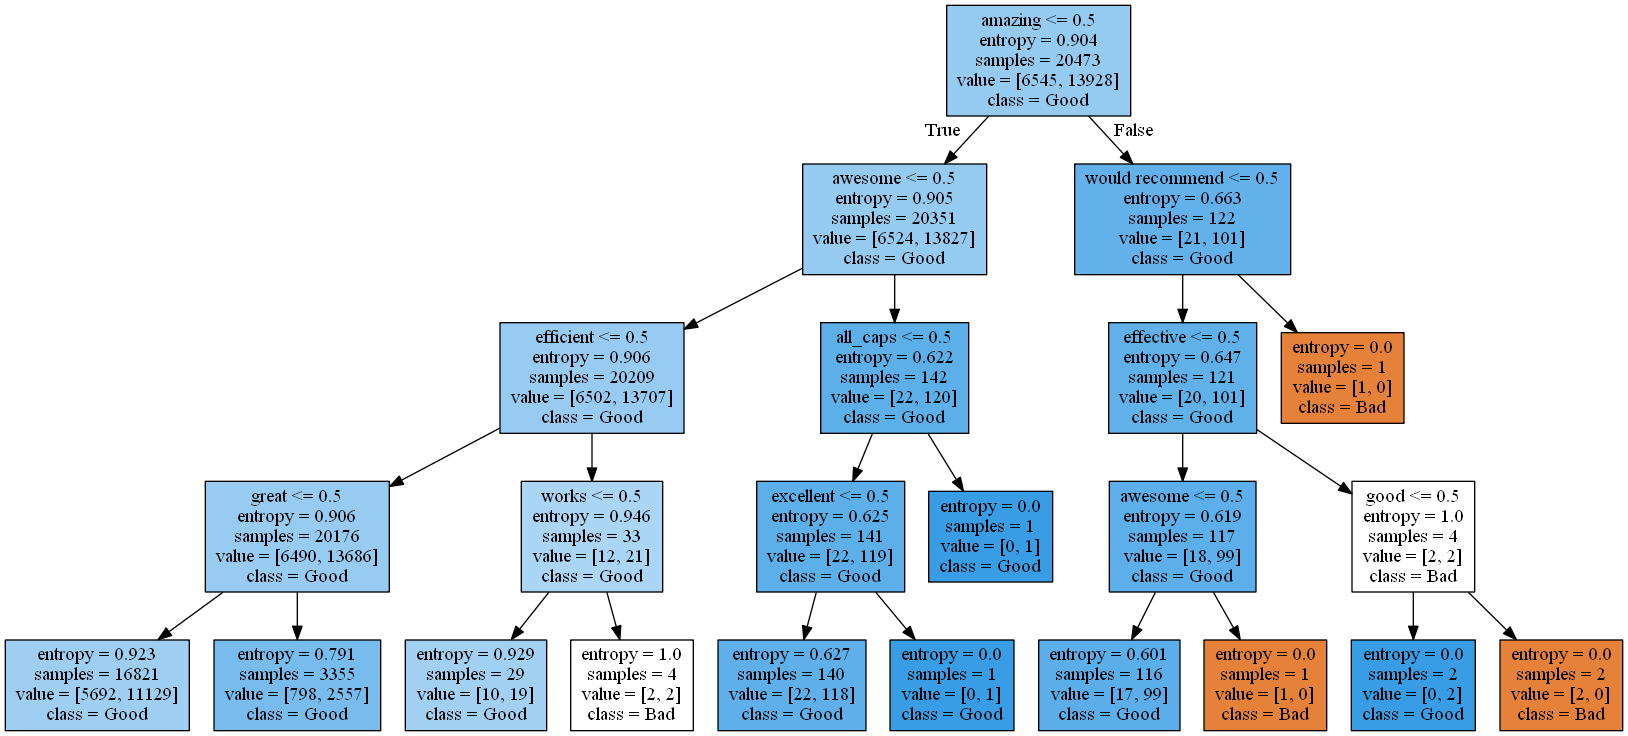

In [79]:
dot_data=tree.export_graphviz(
    decision_tree, out_file = None,
    feature_names=data.columns,
    class_names=['Bad', 'Good'],
    filled = True
    )
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [80]:
y_pred = decision_tree.predict(data)

wrong = (target != y_pred).sum()
total = data.shape[0]

print ('Mislabeled:', wrong)
print ('Total:', total)
print ('Percent correct:', 100-((wrong/total)*100))

Mislabeled: 6541
Total: 20473
Percent correct: 68.05060323352708


In [85]:
from sklearn.svm import SVC

svm=SVC(kernel = 'linear')
svm.fit(data, target)
y_pred = svm.predict(data)

wrong = (target != y_pred).sum()
total = data.shape[0]

print ('Mislabeled:', wrong)
print ('Total:', total)
print ('Percent correct:', 100-((wrong/total)*100))

Mislabeled: 6545
Total: 20473
Percent correct: 68.03106530552435


## The decision tree slightly outperforms the other models. Now to test on another review dataset:

In [96]:
df_music = pd.read_json(r'C:/Users/harr1/Downloads/reviews_Musical_Instruments_5.json.gz', lines=True)

In [108]:
keywords = ['good', 'helpful', 'awesome', 'great', 'efficient', 'works', 'amazing', 'would recommend', 'well made', 'good quality', 'best', 'effective', 'excellent']
for key in keywords:
        df_music[str(key)] = df_music.reviewText.str.contains(
        ' ' + str(key) + ' ',
            case = False
        )


In [109]:
df_music['good review'] = (df_music['overall'] == 4 | 5)
df_music['all_caps']=df_music.reviewText.str.isupper()
data = df_music[keywords + ['all_caps']]
target = df_music['good review']

In [110]:
from sklearn.svm import SVC

svm=SVC(kernel = 'linear')
svm.fit(data, target)
y_pred = svm.predict(data)

wrong = (target != y_pred).sum()
total = data.shape[0]

print ('Mislabeled:', wrong)
print ('Total:', total)
print ('Percent correct:', 100-((wrong/total)*100))

Mislabeled: 3316
Total: 10261
Percent correct: 67.68346165091123


## Model performs pretty similarly for the musical instrument dataset, performance only slightly reduced. 